<a href="https://colab.research.google.com/github/zzhining/python_ml_dl2/blob/main/answer/4_2_agglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제1
다음은 붓꽃 데이터 셋에 대해 표준화를 수행한 결과(X_scaled)이다. X_scaled에 대해 병합 계층적 군집화(AgglomerativeClustering) 방식으로 클러스터링을 수행하고, 예측값을 확인하시오.
-	클러스터링 수: 3개
-	군집 간 거리 계산 방법: 와드 연결법


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터셋 로드
data = load_iris()
X = data.data
y = data.target

# 데이터 표준화 (스케일 조정)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<힌트>
```
AgglomerativeClustering()

```

In [2]:
#코드 작성

from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering - 병합 계층적 군집화
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_pred = model.fit_predict(X_scaled)

# 문제2

문제 1에서 예측한 군집 결과와 원본 데이터에 대해서 시각화 하시오.
-	시각화 방법: 산점도(scatter plot)
-	x축: X_scaled 4개의 특성 중 [0] 값, y축: X_scaled 4개의 특성 중 [1] 값
-	각 군집에 따라 다른 색상으로 표시

<힌트>
```
sns.scatterplot()
```

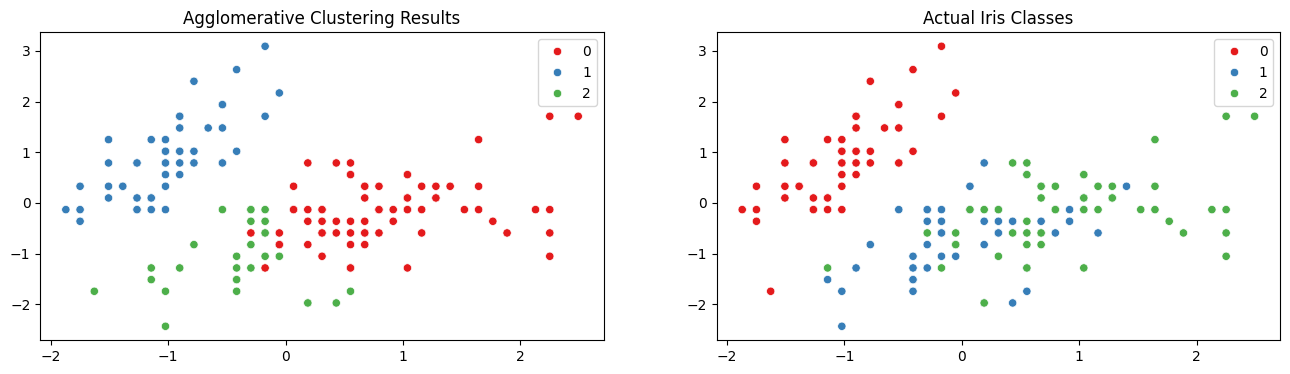

In [3]:
#코드 작성

import matplotlib.pyplot as plt
import seaborn as sns

# 군집화 결과 시각화 (산점도)
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))

# 첫 번째 서브플롯: 군집화된 결과
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred, palette='Set1', ax=ax[0])
ax[0].set_title("Agglomerative Clustering Results")

# 두 번째 서브플롯: 실제 붓꽃 데이터의 클래스
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='Set1', ax=ax[1])
ax[1].set_title("Actual Iris Classes")

plt.show()

# 문제3
문제 1의 주어진 X_scaled 데이터에 대해 덴드로그램을 그리시오.
-	군집 간 거리 계산방법: 와드 연결법
-	label: 붓꽃 데이터의 품종

<힌트>
```
linkage()
dendrogram()
```


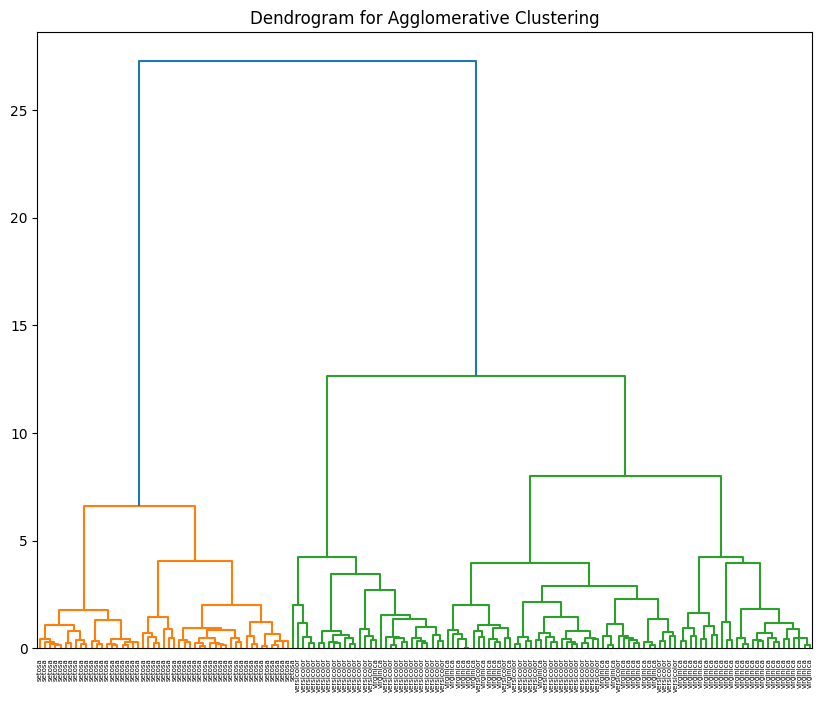

In [4]:
#코드 작성

from scipy.cluster.hierarchy import dendrogram, linkage

# 덴드로그램 생성 (계층적 군집화의 트리 구조 확인)
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 8))
dendrogram(linked, labels=data.target_names[y])
plt.title("Dendrogram for Agglomerative Clustering")
plt.show()